In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'your_dataset.csv' and 'Y_variable' with your actual dataset and target variable
df = pd.read_csv('D:/PROTAC-QSAR/CRBN-PROTAC.csv')


In [19]:
df.head()

,Name,pDC50,Molecular Weight,Heavy Atom Count,Ring Count,Rotatable Bond Count,Topological Polar Surface Area,Hydrogen Bond Acceptor Count,Hydrogen Bond Donor Count,cLogP,...,Amines,Alkyl-Amines,Aromatic Amines,Aromatic Nitrogens,Basic Nitrogens,Acidic Oxygens,Globularity SVD,Globularity Vol,VDW-Surface,VDW-Volume
0,1,8.35,1405.095,96,10,30,245.64,19,4,8.6817,...,6,3,3,0,3,0,0.34564,0.49423,1196.4,1351.4
1,2,8.20,1457.175,100,10,34,263.88,20,4,10.7215,...,5,2,3,3,2,0,0.32598,0.48597,1256.7,1418.3
2,3,7.97,1231.883,84,9,22,214.71,15,4,9.3362,...,5,2,3,0,2,0,0.38183,0.52747,1016.7,1166.7
3,4,8.60,1350.015,92,9,30,242.40,18,4,8.9959,...,5,2,3,0,2,0,0.35342,0.50422,1141.7,1297.9
4,5,6.00,1447.675,105,11,36,422.77,29,7,3.6765,...,5,2,3,12,5,0,0.36990,0.47887,1310.6,1477.1


In [21]:
# Assume 'pDC50' is the target variable and 'Name' is a non-feature column
X = df.drop(['pDC50', 'Name'], axis=1)  # Features
y = df['pDC50']  # Target variable



In [22]:
# Data Preprocessing
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)  # Replace NaN with mean for numerical features



In [23]:
# Feature scaling (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [25]:
# Initialize the Linear Regression model
model = LinearRegression()

In [26]:
# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [28]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [29]:
print(f'Training MSE: {train_mse:.2f}, R^2: {train_r2:.2f}')
print(f'Test MSE: {test_mse:.2f}, R^2: {test_r2:.2f}')

Training MSE: 0.77, R^2: 0.52
Test MSE: 1.19, R^2: 0.31


In [47]:
# Scatter plot for predictions
plt.figure(figsize=(6, 4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

(4.3, 11.0)

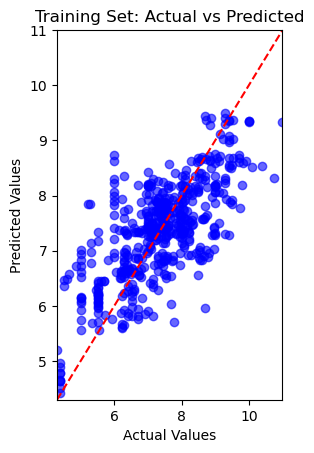

In [31]:
# Scatter plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_train.min(), y_train.max()])
plt.ylim([y_train.min(), y_train.max()])

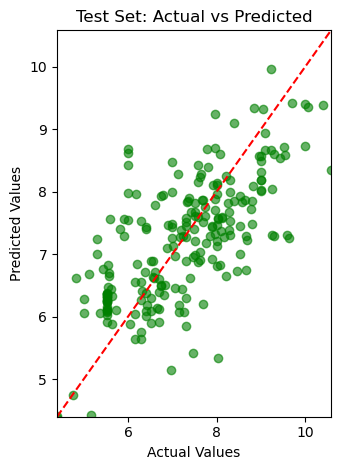

In [32]:
# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()

In [33]:
# Model coefficients and equation
coefficients = model.coef_
intercept = model.intercept_

In [34]:
# Get feature names
feature_names = X.columns

In [35]:
# Construct the model equation
equation = "pDC50 = {:.2f}".format(intercept)
for coef, feature in zip(coefficients, feature_names):
    equation += " + ({:.2f} * {})".format(coef, feature)

print("\nModel Equation:")
print(equation)


Model Equation:
pDC50 = 7.30 + (-0.07 * Molecular Weight) + (-1.28 * Heavy Atom Count) + (-0.10 * Ring Count) + (-0.41 * Rotatable Bond Count) + (-1.03 * Topological Polar Surface Area) + (1.26 * Hydrogen Bond Acceptor Count) + (3.87 * Hydrogen Bond Donor Count) + (0.11 * cLogP) + (-0.27 * cLogP 2) + (-0.32 * cLogS) + (-0.79 * H-Acceptors) + (-3.66 * H-Donors) + (0.44 * Total Surface Area) + (-1.52 * Relative PSA) + (1.21 * Polar Surface Area) + (-0.00 * Fragments) + (-1.28 * Non-H Atoms) + (0.60 * Non-C/H Atoms) + (-0.00 * Metal-Atoms) + (0.60 * Electronegative Atoms) + (0.08 * Stereo Centers) + (0.87 * Rotatable Bonds) + (-0.10 * Rings Closures) + (0.99 * Aromatic Atoms) + (0.54 * sp3-Atoms) + (0.36 * Symmetric atoms) + (0.11 * Small Rings) + (0.05 * Carbo-Rings) + (0.06 * Hetero-Rings) + (-0.06 * Saturated Rings) + (0.05 * Non-Aromatic Rings) + (0.03 * Aromatic Rings) + (0.14 * Saturated Carbo-Rings) + (0.12 * Non-Aromatic Carbo-Rings) + (-0.03 * Carbo-Aromatic Rings) + (-0.14 * Sa

Top 8 Features:
                           Feature  Coefficient
6        Hydrogen Bond Donor Count     3.029789
11                        H-Donors    -2.933567
14              Polar Surface Area     2.211936
21                 Rotatable Bonds     2.005129
4   Topological Polar Surface Area    -1.791684
13                    Relative PSA    -1.767265
23                  Aromatic Atoms     1.133386
3             Rotatable Bond Count    -1.042806

Training MSE (Top Features): 1.17, R^2: 0.28
Test MSE (Top Features): 1.32, R^2: 0.23


Text(0.5, 0, 'Actual Values')

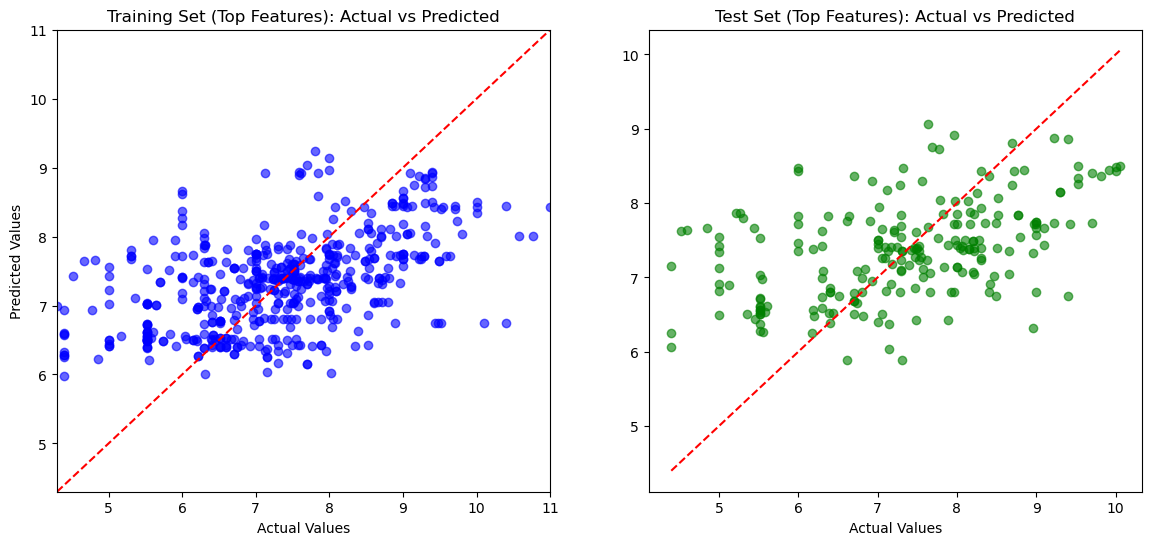

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset
df = pd.read_csv('D:/PROTAC-QSAR/CRBN-data_outlier_free.csv')

# Assume 'pDC50' is the target variable and 'Name' is a non-feature column
X = df.drop(['pDC50', 'Name'], axis=1)  # Features
y = df['pDC50']  # Target variable

# Data Preprocessing
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)  # Replace NaN with mean for numerical features

# Feature scaling (optional, but recommended for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Get coefficients and feature names
coefficients = model.coef_
feature_names = X.columns

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Select the top 8 features based on absolute coefficient values
top_features = coef_df.reindex(coef_df['Coefficient'].abs().nlargest(8).index)

# Print the top features
print("Top 8 Features:")
print(top_features)

# Create a new DataFrame with only the top features
X_top = X[top_features['Feature']]

# Scale the new feature set
X_top_scaled = scaler.fit_transform(X_top)

# Split the new dataset into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.3, random_state=10)

# Initialize a new Linear Regression model
model_top = LinearRegression()

# Fit the new model on the training data
model_top.fit(X_train_top, y_train_top)

# Make predictions on the training and test sets
y_train_top_pred = model_top.predict(X_train_top)
y_test_top_pred = model_top.predict(X_test_top)

# Evaluate the new model
train_mse_top = mean_squared_error(y_train_top, y_train_top_pred)
test_mse_top = mean_squared_error(y_test_top, y_test_top_pred)
train_r2_top = r2_score(y_train_top, y_train_top_pred)
test_r2_top = r2_score(y_test_top, y_test_top_pred)

print(f'\nTraining MSE (Top Features): {train_mse_top:.2f}, R^2: {train_r2_top:.2f}')
print(f'Test MSE (Top Features): {test_mse_top:.2f}, R^2: {test_r2_top:.2f}')

# Scatter plot for predictions with top features
plt.figure(figsize=(14, 6))

# Scatter plot for training set
plt.subplot(1, 2, 1)
plt.scatter(y_train_top, y_train_top_pred, color='blue', alpha=0.6)
plt.plot([y_train_top.min(), y_train_top.max()], [y_train_top.min(), y_train_top.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set (Top Features): Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_train_top.min(), y_train_top.max()])
plt.ylim([y_train_top.min(), y_train_top.max()])

# Scatter plot for test set
plt.subplot(1, 2, 2)
plt.scatter(y_test_top, y_test_top_pred, color='green', alpha=0.6)
plt.plot([y_test_top.min(), y_test_top.max()], [y_test_top.min(), y_test_top.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Test Set (Top Features): Actual vs Predicted')
plt.xlabel('Actual Values')

In [84]:
# Model coefficients and equation
coefficients = model_top.coef_
intercept = model_top.intercept_

In [85]:
# Get feature names
feature_names = X.columns

In [86]:
# Construct the model equation
equation = "pDC50 = {:.2f}".format(intercept)
for coef, feature in zip(coefficients, feature_names):
    equation += " + ({:.2f} * {})".format(coef, feature)

print("\nmodel_top Equation:")
print(equation)


model_top Equation:
pDC50 = 7.34 + (0.07 * Molecular Weight) + (-0.27 * Heavy Atom Count) + (0.74 * Ring Count) + (-4.04 * Rotatable Bond Count) + (-0.68 * Topological Polar Surface Area) + (-0.28 * Hydrogen Bond Acceptor Count) + (-0.10 * Hydrogen Bond Donor Count) + (3.82 * cLogP)


In [60]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load your dataset
# Replace 'your_data.csv' with your actual file path
data = pd.read_csv("D:/PROTAC-QSAR/CRBN-PROTAC.csv") 

# Assume 'pDC50' is the target variable and 'Name' is a non-feature column
X = df.drop(['pDC50', 'Name'], axis=1)  # Features
y = df['pDC50']  # Target variable


In [62]:
# Data Preprocessing
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)  # Replace NaN with mean for numerical features


In [69]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data (important for PLS)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()


In [70]:
# Define and fit the PLS regression model
# Choose the number of components based on your data
pls = PLSRegression(n_components=2)  # Adjust components as needed
pls.fit(X_train, y_train)



PLSRegression()

In [71]:
# Predict on the test set
y_pred = pls.predict(X_test)


In [72]:
# Reverse the scaling for interpretability
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))


In [73]:
# Evaluate the model
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.2379241336635711
R-squared: 0.2828531609028364


PLS Coefficients: [[-0.00789542 -0.01473173  0.03116509 -0.02116822 -0.03911455 -0.00127622
  -0.02614216  0.01643163  0.00622574 -0.03204103 -0.0190242  -0.03066885
  -0.01288721 -0.03452477 -0.0287252   0.         -0.01473173 -0.00071813
   0.         -0.00071813 -0.06803823 -0.02969163  0.03116509  0.00811404
  -0.0105441   0.05995767  0.02321517  0.01031423  0.01233037  0.00591313
   0.01521614  0.0023456   0.0120845  -0.0083494   0.01530206  0.00034314
   0.0254561  -0.00973891 -0.01476713  0.09114353  0.04808031  0.09274864
  -0.01268368  0.04289398 -0.05091553 -0.05952942 -0.00680776 -0.00844416
  -0.01211658]]


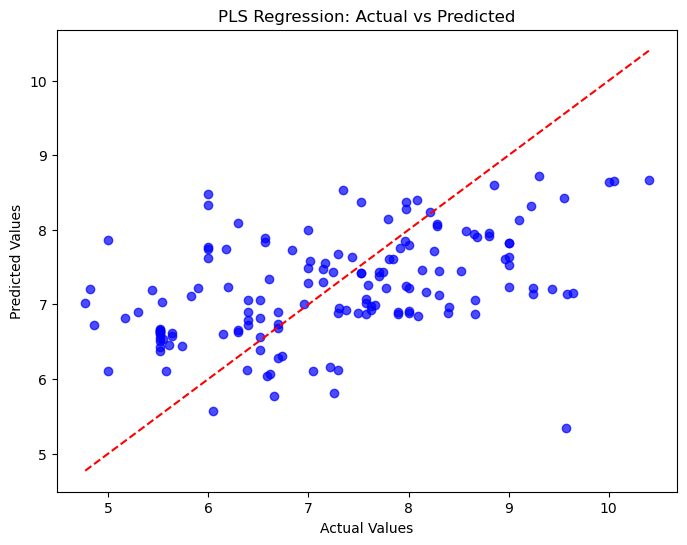

In [68]:
# Optional: Print the coefficients
print("PLS Coefficients:", pls.coef_)

# Plotting predictions vs actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred_original, color="blue", alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("PLS Regression: Actual vs Predicted")
plt.show()

In [75]:
coefficients = pls.coef_
print("Model Coefficients (for each feature in X):")
print(coefficients)


Model Coefficients (for each feature in X):
[[-0.00662542 -0.01410827  0.0291196  -0.0190718  -0.03949557  0.00091823
  -0.02798936  0.02378835  0.00821749 -0.0341654  -0.01984787 -0.03219357
  -0.0117225  -0.03411882 -0.02822486  0.         -0.01410827 -0.00091699
   0.         -0.00091699 -0.06297479 -0.0272736   0.0291196   0.00935826
  -0.00638612  0.05571977  0.02287338  0.01002023  0.01208432  0.0050868
   0.01339069  0.00411308  0.01350524 -0.00712274  0.01438308 -0.00106838
   0.02203751 -0.0068415  -0.02029836  0.08659835  0.04707257  0.08699916
  -0.01100855  0.0420663  -0.05084645 -0.0490536  -0.00500811 -0.00796907
  -0.01058734]]


In [76]:
# Displaying the equation of the model in terms of X features
feature_names = X.columns
model_equation = "y = " + " + ".join([f"({coef[0]:.4f})*{name}" for coef, name in zip(coefficients, feature_names)])
print("\nModel Equation:")
print(model_equation)


Model Equation:
y = (-0.0066)*Molecular Weight


In [77]:
# Predict on the training and test sets
y_train_pred = pls.predict(X_train)
y_test_pred = pls.predict(X_test)

In [78]:
# Reverse the scaling for interpretability
y_train_pred_original = scaler_y.inverse_transform(y_train_pred)
y_test_pred_original = scaler_y.inverse_transform(y_test_pred)
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))

In [79]:
# Evaluate the model on both training and test sets
train_mse = mean_squared_error(y_train_original, y_train_pred_original)
train_r2 = r2_score(y_train_original, y_train_pred_original)
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_r2 = r2_score(y_test_original, y_test_pred_original)

print("Training Set - Mean Squared Error:", train_mse)
print("Training Set - R-squared:", train_r2)
print("Test Set - Mean Squared Error:", test_mse)
print("Test Set - R-squared:", test_r2)

Training Set - Mean Squared Error: 1.2025999239496898
Training Set - R-squared: 0.2540590676080233
Test Set - Mean Squared Error: 1.2379241336635711
Test Set - R-squared: 0.2828531609028364


In [80]:
# Plotting predictions vs actual values for both training and test sets
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Training Set: Actual vs Predicted for pDC50')

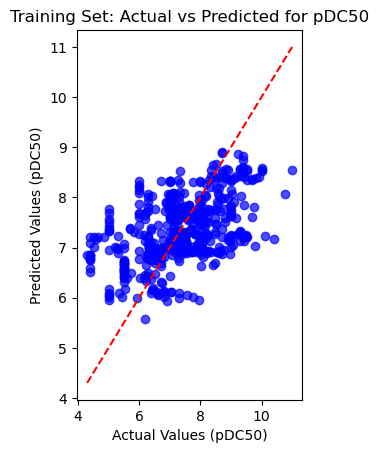

In [81]:
# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train_original, y_train_pred_original, color="blue", alpha=0.7)
plt.plot([min(y_train_original), max(y_train_original)], [min(y_train_original), max(y_train_original)], 'r--')
plt.xlabel("Actual Values (pDC50)")
plt.ylabel("Predicted Values (pDC50)")
plt.title("Training Set: Actual vs Predicted for pDC50")


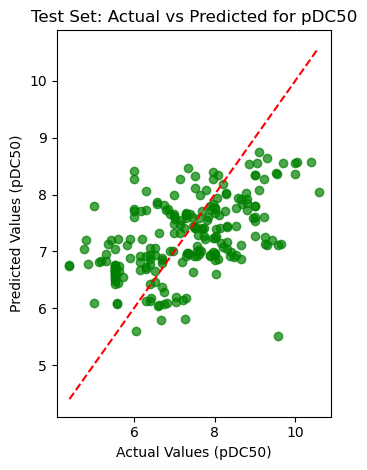

In [82]:
# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test_original, y_test_pred_original, color="green", alpha=0.7)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'r--')
plt.xlabel("Actual Values (pDC50)")
plt.ylabel("Predicted Values (pDC50)")
plt.title("Test Set: Actual vs Predicted for pDC50")

plt.tight_layout()
plt.show()